In [2]:
%pylab inline


pylab.rcParams['figure.figsize'] = (8.0, 4.0)

Populating the interactive namespace from numpy and matplotlib


In [3]:
from collections import Counter
import heapq
import sympy,re
from sympy.abc import x
import os
import glob
from pprint import pprint

def import_cfs(directory, filename):
    os.chdir(directory)
    d = [open(f,'r') for f in glob.glob(filename+'*')]
    cf ={}
    for f in d:
        key = f.readline()
        cf[key] = []
        for i in f.readlines():
            a = int(i.split(',')[0])
            cf[key].append(int(a))
    return cf

def get_maxes(cf):
    maxes={p:[] for p in cf}
    prevMax = {p:0 for p in cf}
    for p in cf:
        for c in cf[p]:
            prevMax[p] = max(c, prevMax[p])
            maxes[p].append(prevMax[p])
    return maxes

def get_means(cf):
    means = {c:numpy.cumsum(cf[c]) for c in cf}
    for c in cf:
        for i in range(1,len(cf[c])+1):
            means[c][i-1] = means[c][i-1]/i
    return means

def get_runningmeans(cf, var):
    return {c:np.convolve(cf[c], np.ones((var, ))/var, mode='valid') for c in cf}

def get_counts(cf):
    return {p : Counter(cf[p]) for p in cf}

def diamond_vaaler(cfs):
    output = {}
    for p in cfs:
        cf = cfs[p]
        m = 0
        s = 0
        values = []
        for i in range(1,len(cf)):
            n = i+1
            value = cf[i]
            m = max(m, value)
            s = s + value
            store = (s-m)/(n * log(n))
            values.append(store)
        output[p] = values
    return output

def khintchine(cfs):
    output = {}
    for p in cfs:
        cf = cfs[p]
        m = 1
        values = []
        for i in range(1,len(cf)):
            n = i+1
            value = cf[i]
            m = m*value
            store=pow(2,m.bit_length()/float(n))
            values.append(store)
        output[p] = values
    return output

In [4]:

def maxes_list(polys):
    t=[[0 for i in range(2*len(polys))] for i in range(10)]
    m=0
    for p in polys:
        a=numpy.array(cf[p])
        ind = np.argpartition(a, -10)[-10:]
        ind=sort(ind)
        n=0
        for i in ind:
            t[n][2*m]=i
            t[n][2*m+1]=a[i]
            n+=1
        m+=1
    return t

def sympy_poly(p):
    p =re.sub("[^0-9\-]", ",",p).split(",")
    coeffs = [int(c) for c in p if c!='']
    counter = 0
    y = sympy.poly(0,x)
    for c in coeffs:
        y += sympy.poly(c*x**counter, x)
        counter +=1
    return y

def latex_poly(p):
    return sympy.latex(p.as_expr(), mode='inline')

def disc_poly(p):
    return sympy.discriminant(p)

def plot_stuff(data):
    fig = pyplot.figure()
    ax = fig.add_subplot(111)
    pyplot.rc('text', usetex=True)
    pyplot.rc('font', family='serif')
    plots= []
    for p in data:
        ax.plot(data[p], label=latex_poly(sympy_poly(p)))
    pyplot.legend(loc='upper right');
    ax.figure.show()

def print_polys(polys,cf):
    for c in polys:
        p = sympy_poly(c)
        print(latex_poly(p)+' & '+str(sympy.discriminant(p))  + ' & ' + str(len(cf[c]))+' \\\\')
        
def most_common(polys):
    counts= get_counts(polys)
    n=0
    t= [[0 for i in range(len(polys))] for i in range(10)]
    for p in polys:
        for i in counts[p].most_common(10):
            t[i[0]-1][n]=i[1]*1.0/len(cf[p])
        n+=1
    return t

def export_latex_table(t,f,s):
    numpy.savetxt(s+".csv", t, delimiter=' & ', fmt=f, newline=' \\\\\n')
    
def check(cf):
    for c in cf:
    for k in cf[c]:
        if (k==-1):
            print("oh fuck")
            print c

In [5]:
cf = import_cfs('/usr/userfs/s/sjb577/shared/cf/','cf.job.o253610')
print(cf.keys())
roots = [cf.keys()[9],cf.keys()[6],cf.keys()[0],cf.keys()[8],cf.keys()[2]]
langs = [cf.keys()[4],cf.keys()[3],cf.keys()[10]]
bigpq = [cf.keys()[7],cf.keys()[1],cf.keys()[5]]
allpolys = roots+langs+bigpq

['The coeffs are [-4, 0, 0, 1]\n', 'The coeffs are [-2, 0, -2, 1]\n', 'The coeffs are [-7, 0, 0, 1]\n', 'The coeffs are [-23, -36, 27, -4, -9, 0, 1]\n', 'The coeffs are [-1, -1, 0, 0, 0, 1]\n', 'The coeffs are [-9, -6, 7, 6, 1]\n', 'The coeffs are [-3, 0, 0, 1]\n', 'The coeffs are [-10, -8, 0, 1]\n', 'The coeffs are [-5, 0, 0, 1]\n', 'The coeffs are [-2, 0, 0, 1]\n', 'The coeffs are [-1, -2, 1, 1]\n']


In [17]:
print_polys(allpolys,cf)

$x^{3} - 2$ & -108 & 5010670 \\
$x^{3} - 3$ & -243 & 5459035 \\
$x^{3} - 4$ & -432 & 5459310 \\
$x^{3} - 5$ & -675 & 4188567 \\
$x^{3} - 7$ & -1323 & 5325188 \\
$x^{5} - x - 1$ & 2869 & 3134614 \\
$x^{6} - 9 x^{4} - 4 x^{3} + 27 x^{2} - 36 x - 23$ & 67941730271232 & 2643970 \\
$x^{3} + x^{2} - 2 x - 1$ & 49 & 5284339 \\
$x^{3} - 8 x - 10$ & -652 & 4872810 \\
$x^{3} - 2 x^{2} - 2$ & -172 & 4739352 \\
$x^{4} + 6 x^{3} + 7 x^{2} - 6 x - 9$ & 14400 & 4157834 \\


/scratch/sjb577/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


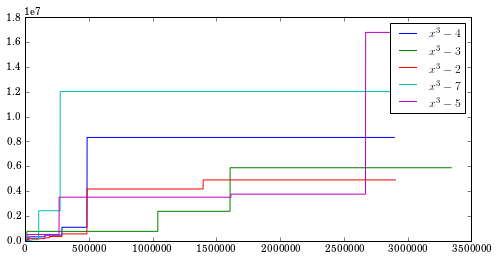

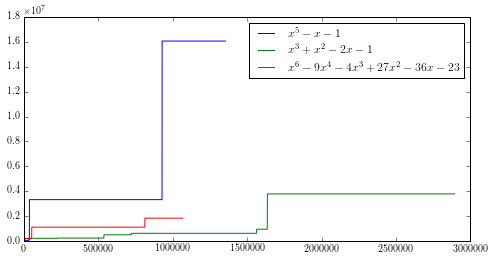

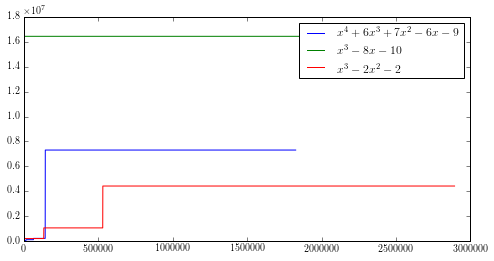

In [5]:
plot_stuff(get_maxes({k:v for (k,v) in cf.items() if k in roots}))
savefig('roots_max.pdf')
plot_stuff(get_maxes({k:v for (k,v) in cf.items() if k in langs}))
savefig('langs_max.pdf')
plot_stuff(get_maxes({k:v for (k,v) in cf.items() if k in bigpq}))
savefig('bigs_max.pdf')

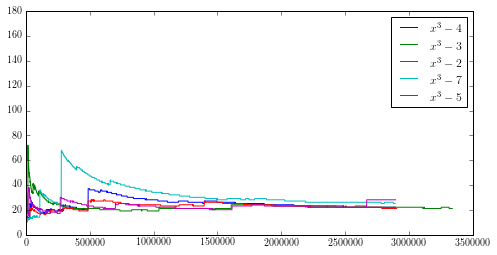

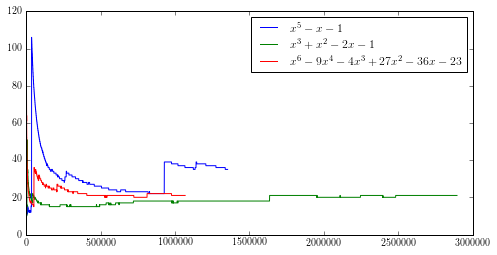

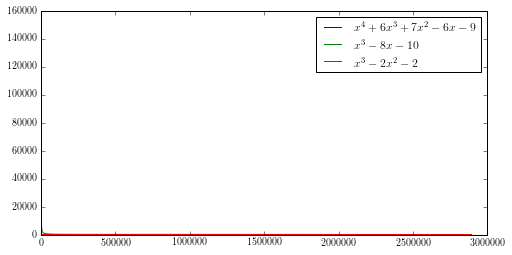

In [6]:
plot_stuff(get_means({k:v for (k,v) in cf.items() if k in roots}))
savefig('roots_means.pdf')
plot_stuff(get_means({k:v for (k,v) in cf.items() if k in langs}))
savefig('langs_means.pdf')
plot_stuff(get_means({k:v for (k,v) in cf.items() if k in bigpq}))
savefig('bigs_means.pdf')

In [18]:
amount = 2500000
expected = 1/ (log(2))
dv=diamond_vaaler({k:v[:amount] for (k,v) in cf.items() if k in roots})
print({latex_poly(sympy_poly(p)):abs(dv[p][-1]-expected) for p in dv.keys()})

dv=diamond_vaaler({k:v[:amount] for (k,v) in cf.items() if k in langs})
print({latex_poly(sympy_poly(p)):abs(dv[p][-1]-expected) for p in dv.keys()})

dv=diamond_vaaler({k:v[:amount] for (k,v) in cf.items() if k in bigpq})
print({latex_poly(sympy_poly(p)):abs(dv[p][-1]-expected) for p in dv.keys()})

{'$x^{3} - 3$': 0.042714984531157629, '$x^{3} - 5$': 0.01009727604146704, '$x^{3} - 2$': 0.046098711953165727, '$x^{3} - 7$': 0.044572318270501343, '$x^{3} - 4$': 0.10842803488758279}
{'$x^{3} + x^{2} - 2 x - 1$': 0.087808234632095417, '$x^{6} - 9 x^{4} - 4 x^{3} + 27 x^{2} - 36 x - 23$': 0.16393537275406378, '$x^{5} - x - 1$': 0.016935616417834476}
{'$x^{3} - 2 x^{2} - 2$': 0.12592951993529677, '$x^{3} - 8 x - 10$': 0.30352126313791072, '$x^{4} + 6 x^{3} + 7 x^{2} - 6 x - 9$': 0.10472415652766776}


In [19]:
amount = 2500000
expected = 2.685452001065306445309714835481
khint=khintchine({k:v[:amount] for (k,v) in cf.items() if k in roots})
print({latex_poly(sympy_poly(p)):abs(khint[p][-1]-expected) for p in khint.keys()})

khint=khintchine({k:v[:amount] for (k,v) in cf.items() if k in langs})
print({latex_poly(sympy_poly(p)):abs(khint[p][-1]-expected) for p in khint.keys()})

khint=khintchine({k:v[:amount] for (k,v) in cf.items() if k in bigpq})
print({latex_poly(sympy_poly(p)):abs(khint[p][-1]-expected) for p in khint.keys()})

{'$x^{3} - 3$': 0.0008874164296055476, '$x^{3} - 5$': 0.0011049597687042834, '$x^{3} - 2$': 0.0009494051238116974, '$x^{3} - 7$': 0.0017194996457456924, '$x^{3} - 4$': 0.0031732026991635465}
{'$x^{3} + x^{2} - 2 x - 1$': 0.00034003579913566284, '$x^{6} - 9 x^{4} - 4 x^{3} + 27 x^{2} - 36 x - 23$': 0.0007060072832598685, '$x^{5} - x - 1$': 0.00036729772999999355}
{'$x^{3} - 2 x^{2} - 2$': 0.0024795500959076122, '$x^{3} - 8 x - 10$': 0.0016978935105549375, '$x^{4} + 6 x^{3} + 7 x^{2} - 6 x - 9$': 7.694124491797183e-05}


In [ ]:
rt=most_common({k:v for (k,v) in cf.items() if k in roots})
lt=most_common({k:v for (k,v) in cf.items() if k in langs})
bt=most_common({k:v for (k,v) in cf.items() if k in bigpq})

In [26]:
actual = [-math.log(1.0-1.0/pow(k+1.0,2),2) for k in range(1, 10)]
print(actual)

[0.4150374992788438, 0.16992500144231246, 0.09310940439148148, 0.058893689053568565, 0.04064198449734593, 0.029747343394052068, 0.02272007650008353, 0.017921907997262457, 0.01449956969511509]


In [27]:
export_latex_table(rt,'%0.5f',"roots_most_common")
export_latex_table(lt,'%0.5f',"langs_most_common")
export_latex_table(bt,'%0.5f',"bigs_most_common")

In [28]:
rt=maxes_list({k:v for (k,v) in cf.items() if k in roots})
lt=maxes_list({k:v for (k,v) in cf.items() if k in langs})
bt=maxes_list({k:v for (k,v) in cf.items() if k in bigpq})

export_latex_table(rt,'%0i',"roots_maxes")
export_latex_table(lt,'%0i',"langs_maxes")
export_latex_table(bt,'%0i',"bigs_maxes")

In [10]:
print({len(cf[k]): k for k in cf.keys()})

{2896960: 'The coeffs are [-5, 0, 0, 1]\n', 2904640: 'The coeffs are [-2, 0, 0, 1]\n', 1353924: 'The coeffs are [-1, -1, 0, 0, 0, 1]\n', 2895493: 'The coeffs are [-1, -2, 1, 1]\n', 2895879: 'The coeffs are [-4, 0, 0, 1]\n', 2893707: 'The coeffs are [-7, 0, 0, 1]\n', 1068556: 'The coeffs are [-23, -36, 27, -4, -9, 0, 1]\n', 3341326: 'The coeffs are [-3, 0, 0, 1]\n', 2892209: 'The coeffs are [-10, -8, 0, 1]\n', 2894041: 'The coeffs are [-2, 0, -2, 1]\n', 1826267: 'The coeffs are [-9, -6, 7, 6, 1]\n'}


In [1]:
degreecf = import_cfs('/usr/userfs/s/sjb577/shared/cf/polysdegree/','increasing_degree.job.01018449')

NameError: name 'import_cfs' is not defined

In [7]:
dv=diamond_vaaler({k:v for (k,v) in newcf.items()[:2]})

/scratch/sjb577/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


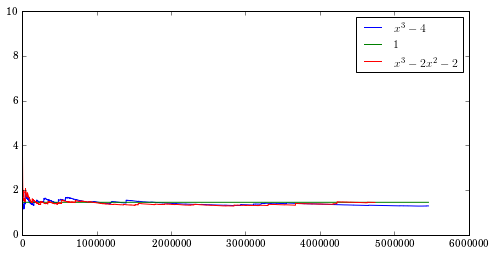

In [8]:
k=newcf.keys()[0]
a=numpy.empty(len(dv[k]))
a.fill(float(1/log(2)))
plot_stuff(dict(dv.items()+{ '1':a}.items()))

(array([  1.96840498e+00,   7.62626779e-01,  -5.37703561e-05]), array([[  4.08733846e-07,   5.60683287e-08,   2.88386586e-11],
       [  5.60683287e-08,   2.05245657e-08,   1.36811038e-11],
       [  2.88386586e-11,   1.36811038e-11,   1.44875064e-13]]))


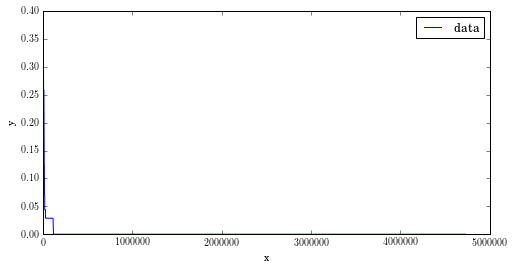

In [41]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


def f(x,a,b,c):
    return a* numpy.power( x,-b)+c


k=newcf.keys()[1]
data = dv[k][10000:]

xdata= numpy.linspace(1, len(data),len(data))
ydata = numpy.minimum.accumulate(numpy.array(abs(data - 1/(numpy.log(2)))))

#popt, pcov = curve_fit(f, xdata,ydata ,maxfev=10000)
print(popt, pcov)
plt.plot(xdata, ydata, 'b-', label='data')
# plt.plot(xdata, f(xdata, *popt), 'r-', label='fit')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

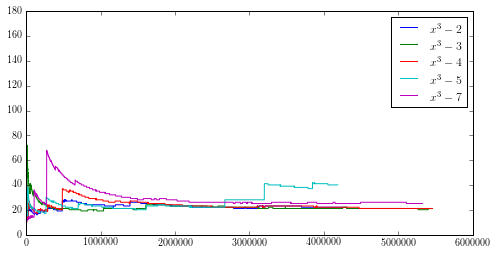

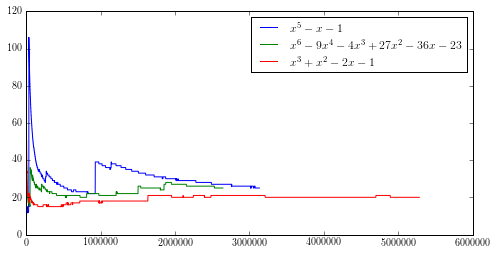

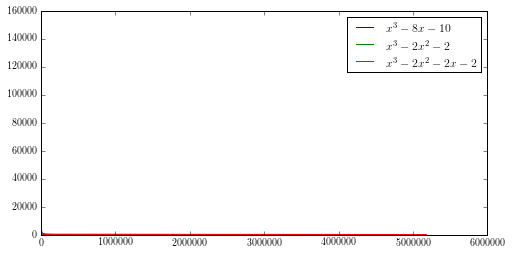

In [27]:
plot_means(roots)

savefig('roots_means.pdf')
plot_means(langs)

savefig('langs_means.pdf')
plot_means(bigpq)

savefig('bigs_means.pdf')

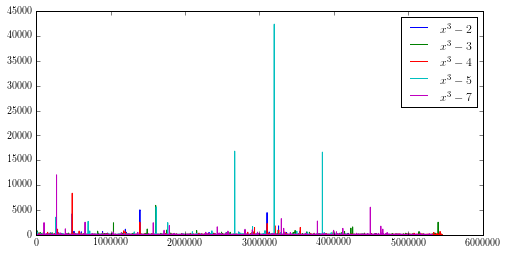

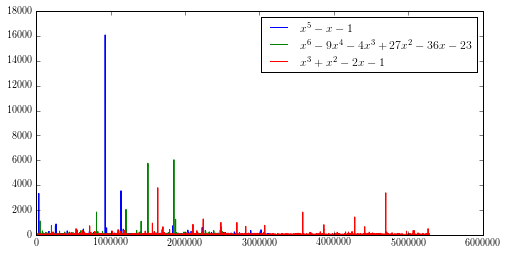

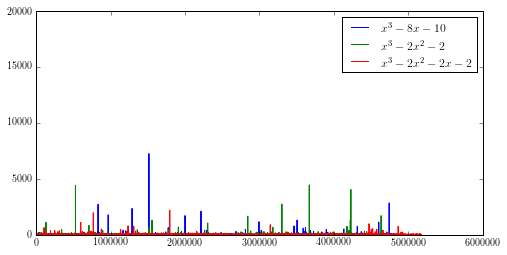

In [28]:
plot_running_means(roots)

savefig('roots_running_means.pdf')
plot_running_means(langs)

savefig('langs_running_means.pdf')
plot_running_means(bigpq)

savefig('bigs_running_means.pdf')

In [ ]:
from pprint import pprint
rt=most_common(roots)
lt=most_common(langs)
bt=most_common(bigpq)
export_latex_table(rt,'%0.5f',"roots_most_common")
export_latex_table(lt,'%0.5f',"langs_most_common")
export_latex_table(bt,'%0.5f',"bigs_most_common")
pprint(rt)
pprint(lt)
pprint(bt)

In [ ]:
rt=maxes_list(roots)
lt=maxes_list(langs)
bt=maxes_list(bigpq)

export_latex_table(rt,'%0i',"roots_maxes")
export_latex_table(lt,'%0i',"langs_maxes")
export_latex_table(bt,'%0i',"bigs_maxes")

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]


/scratch/sjb577/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


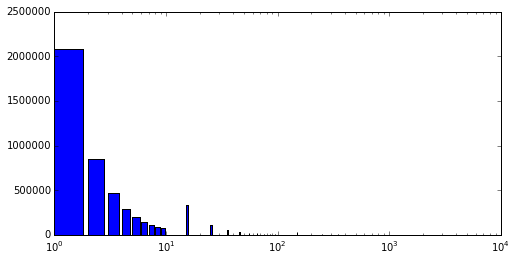

In [17]:
bins = [n*10**j for j in range(0,4) for n in range(1, 10)]
print(bins)
h, b = numpy.histogram(numpy.array(cf[allpolys[0]]), bins=bins)
fig, ax = pyplot.subplots()
center = (b[:-1] + b[1:]) / 2
ax.bar(center,h)
ax.set_xscale('log')
fig.show()
